In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

In [2]:
# df=pd.read_csv("student performance.csv")
# made the data set here made by me
data = {
    'Unnamed: 0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
    'gender': ['female', 'female', 'female', 'male', 'male', 'female', 'male', 'female', 'male', 'male', 'female', 'male', 'female'],
    'math score': [63.0, 71.0, 64.0, 71.0, 68.0, 94.0, 75.0, None, 66.0, 70.0, -99.0, 76.0, 74.0],
    'reading score': [84.0, 80.0, 81.0, 85.0, 86.0, 86.0, 79.0, None, 88.0, 79.0, 80.0, 84.0, 79.0],
    'writing score': [64, 76, 66, 77, 76, 61, 66, 66, 66, 61, 65, -99, 79],
    'placement score': [84.0, 86.0, 81.0, 96.0, None, 100.0, -99.0, 95.0, 88.0, 87.0, 85.0, None, 98.0],
    'club join year': [2020, 2018, 2020, 2018, 2021, 2019, 2020, 2019, 2020, 2021, 2021, 2020, 2019],
    'placement offer': [2, 3, 2, 1, 3, 1, 1, 3, 3, 2, 1, 2, 2]
}

df = pd.DataFrame(data)

In [3]:
df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,NaN,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
7,7,female,NaN,NaN,66,95.0,2019,3
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2


In [4]:
df.isnull()

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,True,True,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [5]:
series = pd.isnull(df["reading score"])
df[series]

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
7,7,female,NaN,NaN,66,95.0,2019,3


In [6]:
df.notnull()

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,False,True,True
5,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True
7,True,True,False,False,True,True,True,True
8,True,True,True,True,True,True,True,True
9,True,True,True,True,True,True,True,True


In [7]:
seseries = pd.notnull(df["reading score"])
df[series]

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
7,7,female,NaN,NaN,66,95.0,2019,3


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder ()
df['gender'] = le.fit_transform(df['gender'])
newdf=df
df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,0,63.0,84.0,64,84.0,2020,2
1,1,0,71.0,80.0,76,86.0,2018,3
2,2,0,64.0,81.0,66,81.0,2020,2
3,3,1,71.0,85.0,77,96.0,2018,1
4,4,1,68.0,86.0,76,NaN,2021,3
5,5,0,94.0,86.0,61,100.0,2019,1
6,6,1,75.0,79.0,66,-99.0,2020,1
7,7,0,NaN,NaN,66,95.0,2019,3
8,8,1,66.0,88.0,66,88.0,2020,3
9,9,1,70.0,79.0,61,87.0,2021,2


In [9]:
df['gender'].replace({1: "male", 0: "female"}, inplace=True)
df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,NaN,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
7,7,female,NaN,NaN,66,95.0,2019,3
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2


In [10]:
ndf=df
ndf.fillna(0)

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,0.0,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
7,7,female,0.0,0.0,66,95.0,2019,3
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2


In [11]:
m_v=df['reading score'].mean()
df['reading score'].fillna(value=m_v, inplace=True)
df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.000000,64,84.0,2020,2
1,1,female,71.0,80.000000,76,86.0,2018,3
2,2,female,64.0,81.000000,66,81.0,2020,2
3,3,male,71.0,85.000000,77,96.0,2018,1
4,4,male,68.0,86.000000,76,NaN,2021,3
5,5,female,94.0,86.000000,61,100.0,2019,1
6,6,male,75.0,79.000000,66,-99.0,2020,1
7,7,female,NaN,82.583333,66,95.0,2019,3
8,8,male,66.0,88.000000,66,88.0,2020,3
9,9,male,70.0,79.000000,61,87.0,2021,2


In [12]:
ndf.replace(to_replace = np.nan, value = -99)

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.000000,64,84.0,2020,2
1,1,female,71.0,80.000000,76,86.0,2018,3
2,2,female,64.0,81.000000,66,81.0,2020,2
3,3,male,71.0,85.000000,77,96.0,2018,1
4,4,male,68.0,86.000000,76,-99.0,2021,3
5,5,female,94.0,86.000000,61,100.0,2019,1
6,6,male,75.0,79.000000,66,-99.0,2020,1
7,7,female,-99.0,82.583333,66,95.0,2019,3
8,8,male,66.0,88.000000,66,88.0,2020,3
9,9,male,70.0,79.000000,61,87.0,2021,2


In [13]:
ndf.dropna()

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2
10,10,female,-99.0,80.0,65,85.0,2021,1
12,12,female,74.0,79.0,79,98.0,2019,2


In [14]:
ndf.dropna(how = 'all')

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.000000,64,84.0,2020,2
1,1,female,71.0,80.000000,76,86.0,2018,3
2,2,female,64.0,81.000000,66,81.0,2020,2
3,3,male,71.0,85.000000,77,96.0,2018,1
4,4,male,68.0,86.000000,76,NaN,2021,3
5,5,female,94.0,86.000000,61,100.0,2019,1
6,6,male,75.0,79.000000,66,-99.0,2020,1
7,7,female,NaN,82.583333,66,95.0,2019,3
8,8,male,66.0,88.000000,66,88.0,2020,3
9,9,male,70.0,79.000000,61,87.0,2021,2


In [15]:
ndf.dropna(axis = 1)

,Unnamed: 0,gender,reading score,writing score,club join year,placement offer
0,0,female,84.000000,64,2020,2
1,1,female,80.000000,76,2018,3
2,2,female,81.000000,66,2020,2
3,3,male,85.000000,77,2018,1
4,4,male,86.000000,76,2021,3
5,5,female,86.000000,61,2019,1
6,6,male,79.000000,66,2020,1
7,7,female,82.583333,66,2019,3
8,8,male,88.000000,66,2020,3
9,9,male,79.000000,61,2021,2


In [16]:
new_data =ndf.dropna (axis = 0, how ='any')
new_data

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2
10,10,female,-99.0,80.0,65,85.0,2021,1
12,12,female,74.0,79.0,79,98.0,2019,2


<Axes: >

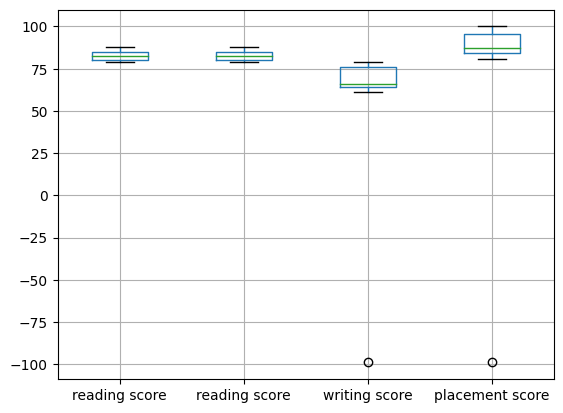

In [17]:
col =['reading score', 'reading score', 'writing score', 'placement score']
df.boxplot(col)

In [18]:
print(np.where(df['reading score']>90))
print(np.where(df['writing score']>90))

(array([], dtype=int64),)
(array([], dtype=int64),)


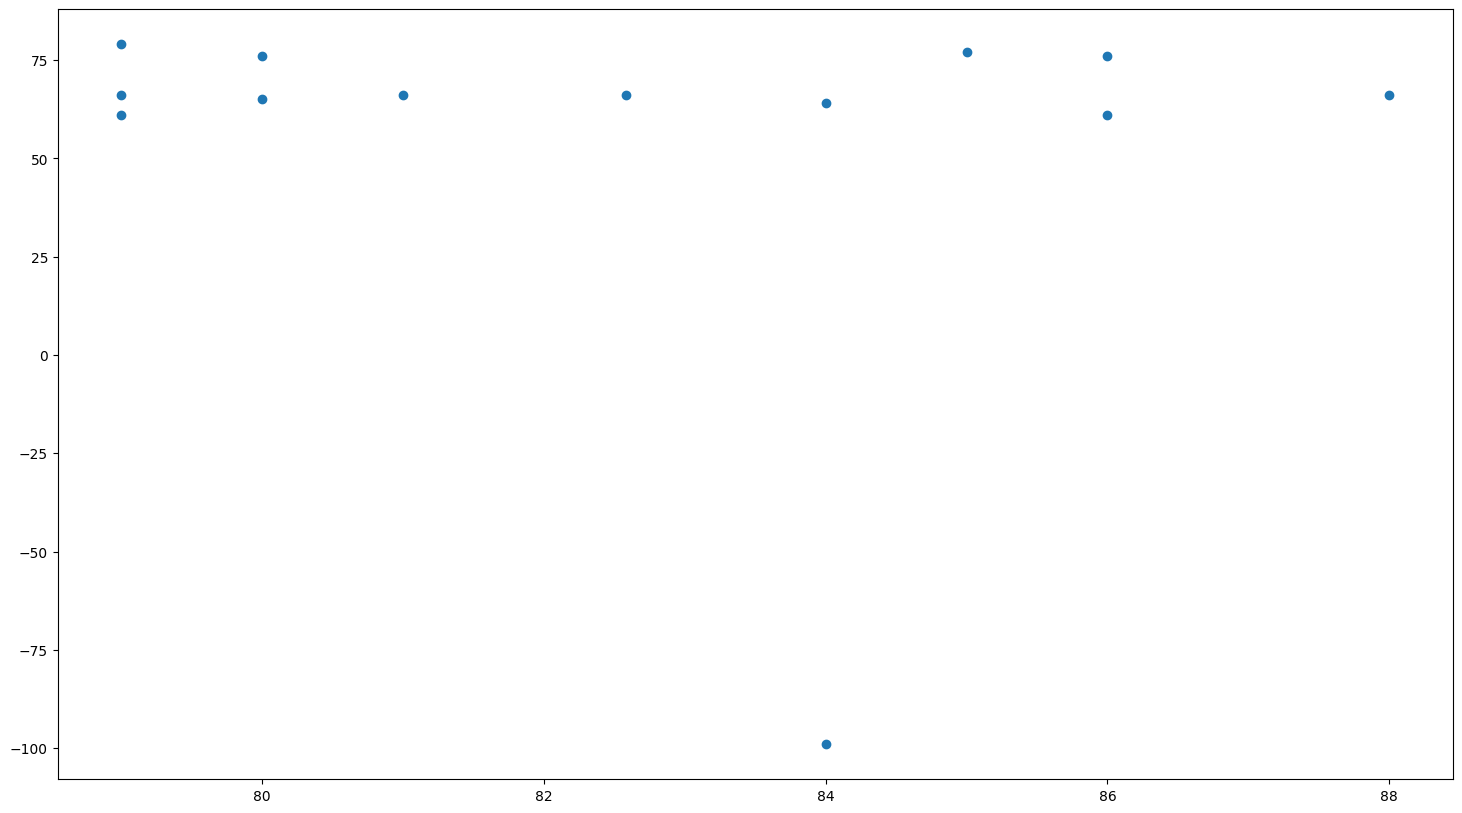

Text(4.444444444444452, 0.5, '(Full-value property-tax rate)/($10,000)')

In [19]:
fig, ax =plt.subplots(figsize = (18,10))
ax.scatter(df['reading score'], df['writing score'])
plt.show()
ax.set_xlabel('(Proportion non-retail business acres)/(town)')
ax.set_ylabel('(Full-value property-tax rate)/($10,000)')

In [20]:
print(np.where((df['reading score']<50) & (df['writing score']>1)))
print(np.where((df['reading score']>85) & (df['writing score']<3)))


(array([], dtype=int64),)
(array([], dtype=int64),)


In [21]:
z = np.abs(stats.zscore(df['reading score']))

In [22]:
print(z)

0     0.472390
1     0.861418
2     0.527966
3     0.805843
4     1.139295
5     1.139295
6     1.194870
7     0.000000
8     1.806199
9     1.194870
10    0.861418
11    0.472390
12    1.194870
Name: reading score, dtype: float64


In [23]:
threshold = 0.18

In [24]:
sample_outliers = np.where(z <threshold)

In [25]:
sample_outliers

(array([7], dtype=int64),)

In [26]:
sorted_rscore= sorted(df['reading score'])

In [27]:
sorted_rscore

[79.0,
 79.0,
 79.0,
 80.0,
 80.0,
 81.0,
 82.58333333333333,
 84.0,
 84.0,
 85.0,
 86.0,
 86.0,
 88.0]

In [28]:
q1 = np.percentile(sorted_rscore, 25)
q3 = np.percentile(sorted_rscore, 75)
print(q1,q3)

80.0 85.0


In [29]:
IQR = q3-q1

In [30]:
lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)
print(lwr_bound, upr_bound)

72.5 92.5


In [31]:
new_df=df
for i in sample_outliers:new_df.drop(i,inplace=True)
new_df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,NaN,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2
10,10,female,-99.0,80.0,65,85.0,2021,1


In [32]:
df=pd.read_csv("student performance.csv")

In [33]:
df_stud=df
ninetieth_percentile = np.percentile(df_stud['reading score'], 90)
b = np.where(df_stud['reading score']>ninetieth_percentile,
ninetieth_percentile, df_stud['reading score'])
print("New array:",b)

New array: [84. 80. 81. 85. 86. 86. 79. nan 88. 79. 80. 84. 79.]


<Axes: >

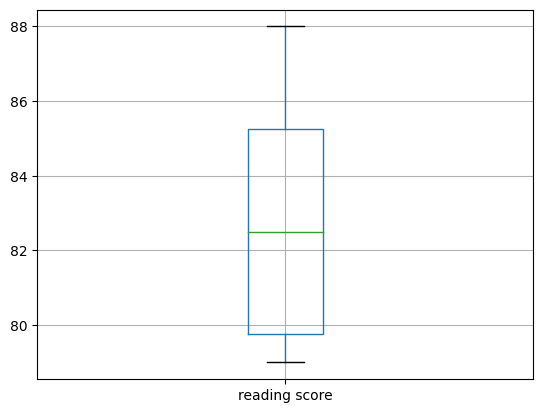

In [34]:
col = ['reading score']

df.boxplot(col)

In [35]:
median=np.median(sorted_rscore)
median

82.58333333333333

In [36]:
refined_df=df
refined_df['reading score'] = np.where(refined_df['reading score'] >upr_bound, median,refined_df['reading score'])

In [37]:
df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,NaN,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
7,7,female,NaN,NaN,66,95.0,2019,3
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2


In [38]:

refined_df['reading score'] = np.where(refined_df['reading score'] <lwr_bound, median,refined_df['reading score'])

In [39]:
df


,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,NaN,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
7,7,female,NaN,NaN,66,95.0,2019,3
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2


<Axes: >

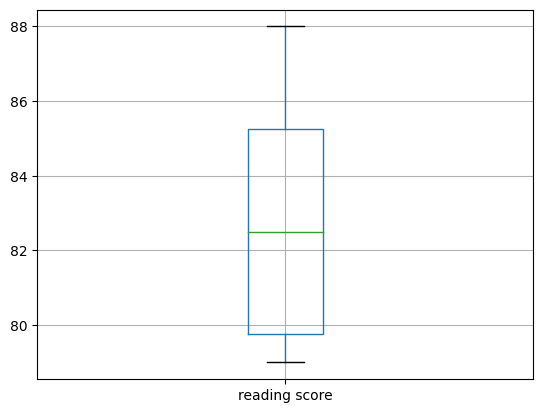

In [40]:
col = ['reading score']
refined_df.boxplot(col)

In [41]:
df

,Unnamed: 0,gender,math score,reading score,writing score,placement score,club join year,placement offer
0,0,female,63.0,84.0,64,84.0,2020,2
1,1,female,71.0,80.0,76,86.0,2018,3
2,2,female,64.0,81.0,66,81.0,2020,2
3,3,male,71.0,85.0,77,96.0,2018,1
4,4,male,68.0,86.0,76,NaN,2021,3
5,5,female,94.0,86.0,61,100.0,2019,1
6,6,male,75.0,79.0,66,-99.0,2020,1
7,7,female,NaN,NaN,66,95.0,2019,3
8,8,male,66.0,88.0,66,88.0,2020,3
9,9,male,70.0,79.0,61,87.0,2021,2


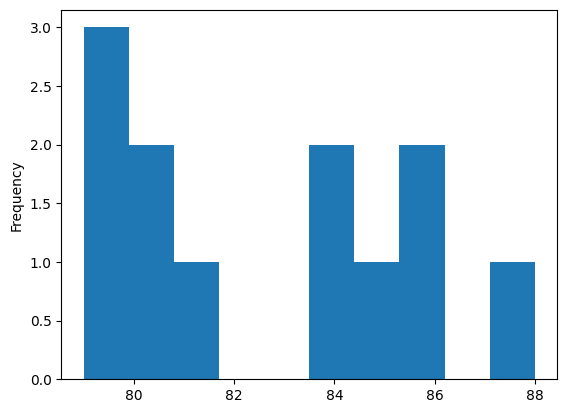

In [42]:
import matplotlib.pyplot as plt
new_df['reading score'].plot(kind ='hist')
df['log_math'] = np.log10(df['reading score'])

<Axes: ylabel='Frequency'>

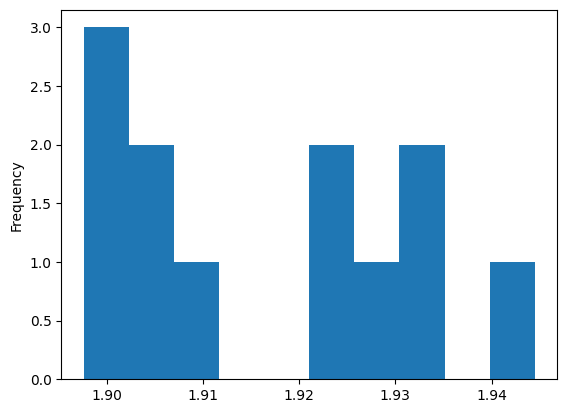

In [43]:
df['log_math'].plot(kind = 'hist')